In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Data Extraction and Loading**

In [3]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/accident_data20.csv', low_memory = False)

In [4]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [5]:
# inspect the columns
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [6]:
# We now want to select specified columns for EDA
columns_of_interest = [ 'longitude', 'latitude',
    'accident_year', 'accident_severity', 'number_of_vehicles',
    'number_of_casualties', 'date', 'day_of_week', 'time',
    'road_type', 'speed_limit', 'junction_detail', 'junction_control',
    'light_conditions',
    'weather_conditions', 'road_surface_conditions',
    'special_conditions_at_site', 'carriageway_hazards',
    'urban_or_rural_area']

data = df[columns_of_interest]

**Initial Data Inspection**

In [7]:
# Display the first few rows of the selected data
data.head()

,longitude,latitude,accident_year,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,-0.254001,51.462262,2020,3,1,1,04/02/2020,3,09:00,6,20,0,-1,1,9,9,0,0,1
1,-0.139253,51.470327,2020,3,1,2,27/04/2020,2,13:55,6,20,9,2,1,1,1,0,0,1
2,-0.178719,51.529614,2020,3,1,1,01/01/2020,4,01:25,6,30,3,1,4,1,2,0,0,1
3,-0.001683,51.541210,2020,2,1,1,01/01/2020,4,01:50,6,30,0,-1,4,1,1,0,0,1
4,-0.137592,51.515704,2020,3,1,2,01/01/2020,4,02:25,6,30,3,4,4,1,1,0,0,1


In [8]:
# First, we check for missing value
data.isnull().sum()

longitude                     14
latitude                      14
accident_year                  0
accident_severity              0
number_of_vehicles             0
number_of_casualties           0
date                           0
day_of_week                    0
time                           0
road_type                      0
speed_limit                    0
junction_detail                0
junction_control               0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
special_conditions_at_site     0
carriageway_hazards            0
urban_or_rural_area            0
dtype: int64

In [9]:
# Drop null values
df = df.dropna(subset=['latitude', 'longitude'])

In [10]:
# check for the overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   91185 non-null  float64
 1   latitude                    91185 non-null  float64
 2   accident_year               91199 non-null  int64  
 3   accident_severity           91199 non-null  int64  
 4   number_of_vehicles          91199 non-null  int64  
 5   number_of_casualties        91199 non-null  int64  
 6   date                        91199 non-null  object 
 7   day_of_week                 91199 non-null  int64  
 8   time                        91199 non-null  object 
 9   road_type                   91199 non-null  int64  
 10  speed_limit                 91199 non-null  int64  
 11  junction_detail             91199 non-null  int64  
 12  junction_control            91199 non-null  int64  
 13  light_conditions            911

In [11]:
# check for the summary statistics
data.describe()

,longitude,latitude,accident_year,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,91185.000000,91185.000000,91199.0,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,-1.189258,52.351073,2020.0,2.768232,1.835272,1.267382,4.121558,5.256001,36.270113,3.934879,1.737497,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205
std,1.367786,1.327573,0.0,0.456682,0.677272,0.681473,1.932200,1.684878,13.896032,12.612777,2.510125,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031
min,-7.497375,49.970479,2020.0,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,-2.107789,51.457237,2020.0,3.000000,1.000000,1.000000,2.000000,6.000000,30.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,-1.046912,51.763385,2020.0,3.000000,2.000000,1.000000,4.000000,6.000000,30.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,-0.125238,53.297386,2020.0,3.000000,2.000000,1.000000,6.000000,6.000000,40.000000,3.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,1.756257,60.541144,2020.0,3.000000,13.000000,41.000000,7.000000,9.000000,70.000000,99.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000


**Summary Statistics Results**

* All accidents occur in the year 2020 as expected.
* Accident severity ranges from 1 (most severe) to 3 (least severe), the mean is 2.77, indicating that most accidents in 2020 are less severe
* Number of vehicles ranges from 1 to 13, and the mean is 1.84 suggesting that most accidents involve only 1 or 2 vehicles
* Number of casualties ranges from 1 to 16, and the mean is 1.27, indicating that most accidents results in small number of casualties
* For the speed limit, the range is from -1 (possibly indicating mssing or erroneous data) to 70mph. It has a mean of 36.27
* Date has 366 unique dates, indicating a data for a full leap year
* Day of the week has 7 unique values, one for each day








In [12]:
# Check for unique values in all the columns
data.nunique()

longitude                     89589
latitude                      88748
accident_year                     1
accident_severity                 3
number_of_vehicles               13
number_of_casualties             16
date                            366
day_of_week                       7
time                           1438
road_type                         6
speed_limit                       7
junction_detail                  11
junction_control                  6
light_conditions                  6
weather_conditions               10
road_surface_conditions           7
special_conditions_at_site       10
carriageway_hazards               8
urban_or_rural_area               3
dtype: int64

**Observations for Data Cleaning**

Using the data dictionary the following observations were noted:
* junction_detail has 11 uniques values instead of 9   
* junction_control has 6 unique values instead of 4
* light_condition has 6 unique values instead of 5
* weather_conditions has 10 unique values instead of 9
* road_surface_condition has 7 unique values instead of 5
* special_condition_at_site has 10 unique values instead of 8
* carriageway_hazards has 8 unique values instead of 6
* urban_or_rural_area has 3 unique values intead of 2
* Change data type for date and time column












**Data Cleaning**

In [13]:
# Use value count and viz to to understand the distribution of values in the column including
# the anomalies
def value_counts_and_viz(data, column_name):
    """
    Function to perform value count and visualization for a specified column in a DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze.

    Returns:
    None
    """
    if column_name not in data.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return

    # Perform value count
    value_counts = data[column_name].value_counts()
    print(value_counts)

    # Plot the value counts
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

junction_detail
 0     37978
 3     25626
 6      8429
 1      7326
 9      4705
 8      1887
 99     1508
 2      1300
 7      1279
 5      1159
-1         2
Name: count, dtype: int64


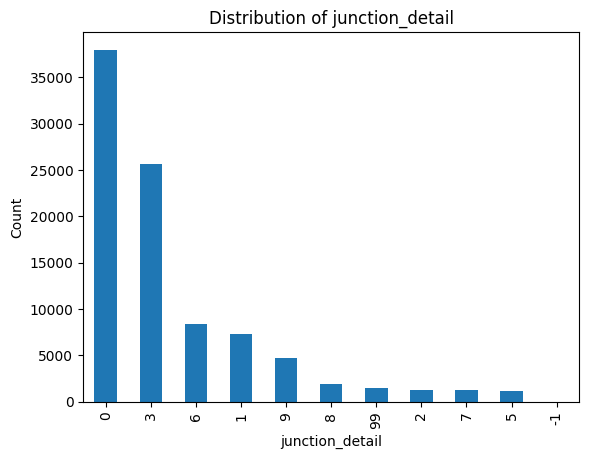

junction_control
 4    39998
-1    38298
 2    10407
 9     1536
 3      583
 1      377
Name: count, dtype: int64


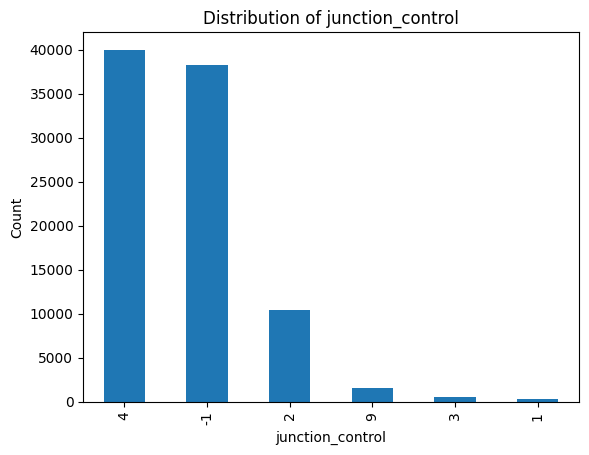

light_conditions
 1    64458
 4    19026
 6     4835
 7     2194
 5      685
-1        1
Name: count, dtype: int64


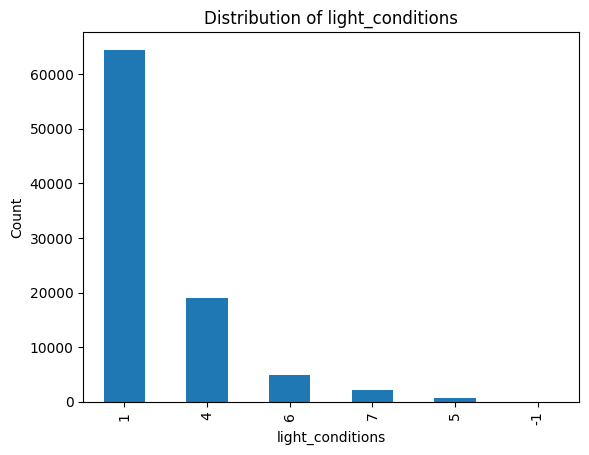

weather_conditions
 1    70729
 2    11583
 8     2629
 9     2423
 5     1665
 4     1401
 7      510
 3      185
 6       73
-1        1
Name: count, dtype: int64


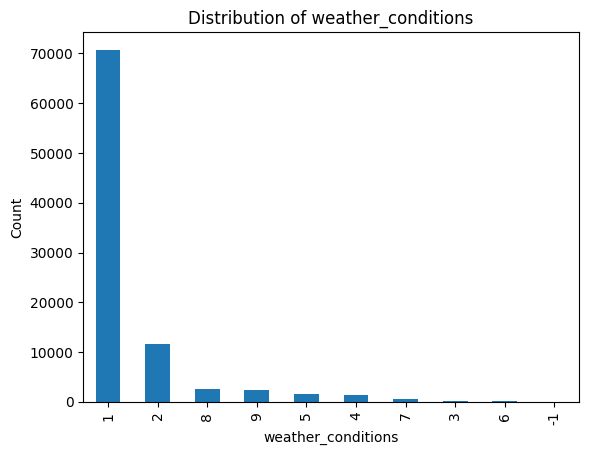

road_surface_conditions
 1    62698
 2    26240
 9      847
 4      764
-1      316
 5      184
 3      150
Name: count, dtype: int64


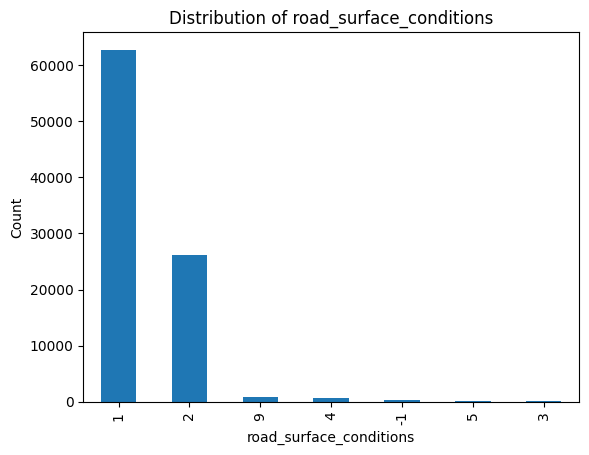

special_conditions_at_site
 0    87309
 9     1452
 4     1106
 7      317
 5      228
-1      218
 1      213
 3      158
 6      151
 2       47
Name: count, dtype: int64


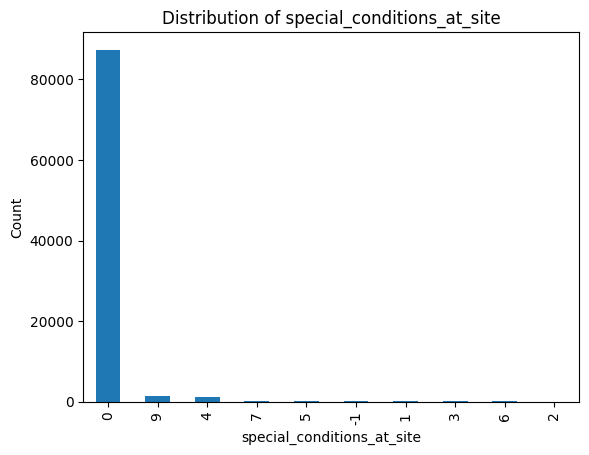

carriageway_hazards
 0    87881
 9     1191
 2     1079
 7      314
 1      220
-1      208
 6      155
 3      151
Name: count, dtype: int64


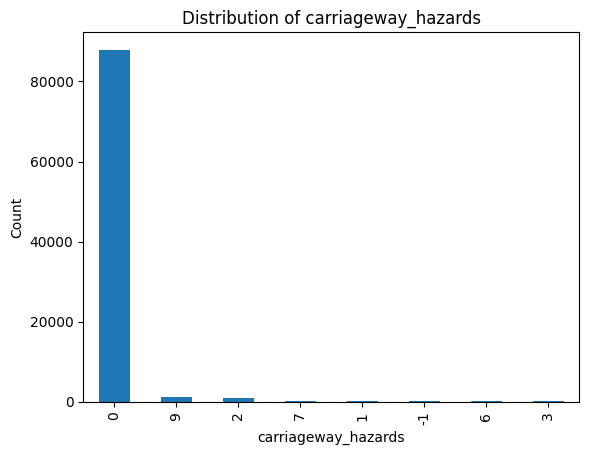

urban_or_rural_area
1    61737
2    29448
3       14
Name: count, dtype: int64


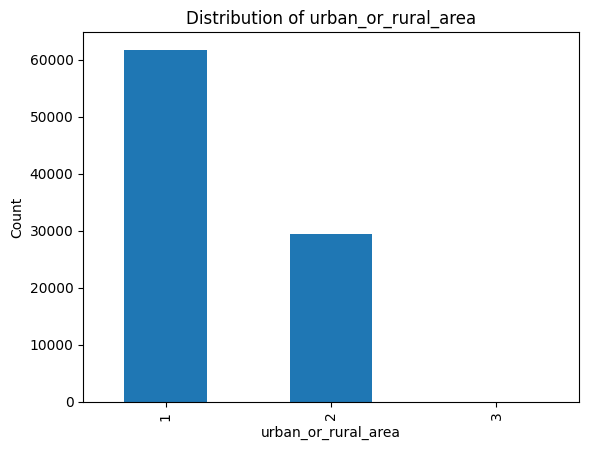

In [14]:
value_counts_and_viz(data, 'junction_detail')
value_counts_and_viz(data, 'junction_control')
value_counts_and_viz(data, 'light_conditions')
value_counts_and_viz(data, 'weather_conditions')
value_counts_and_viz(data, 'road_surface_conditions')
value_counts_and_viz(data, 'special_conditions_at_site')
value_counts_and_viz(data, 'carriageway_hazards')
value_counts_and_viz(data, 'urban_or_rural_area')


In [15]:
# Drop rows with values of -1 in the junction_detail column
data = data[data['junction_detail'] != -1]

# Replace all rows of values 99 with 9
data.loc[data['junction_detail'] == 99, 'junction_detail'] = 9

In [16]:
# drop rows with values of 9 in the junction_control column
data = data[data['junction_control'] != 9]

# Replace all rows of values -1 with 1
data.loc[data['junction_control'] == -1, 'junction_control'] = 1

In [17]:
# Drop rows with values of -1 in the light_condtions coulumn
data = data[data['light_conditions'] != -1]

In [18]:
# Drop rows with values of -1 in the weather_conditions column
data = data[data['weather_conditions'] != -1]

In [19]:
# Drop rows with values of -1 and 9 in the road_surface_condition column
data = data[(data['road_surface_conditions'] != -1) & (data['road_surface_conditions'] != 9)]

In [20]:
# Drop rows with values of -1 and 9 in the special_condition_at_site column
data = data[(data['special_conditions_at_site'] != -1) & (data['special_conditions_at_site'] != 9)]

In [21]:
# Drop rows with values of -1 and 9 in the special_condition_at_site column
data = data[(data['carriageway_hazards'] != -1) & (data['carriageway_hazards'] != 9)]

In [22]:
# Drop rows with values of 3 in the urban_or_rural_area column
data = data[data['urban_or_rural_area'] != 3]

In [23]:
# Check data type for date and time columns
data.dtypes


longitude                     float64
latitude                      float64
accident_year                   int64
accident_severity               int64
number_of_vehicles              int64
number_of_casualties            int64
date                           object
day_of_week                     int64
time                           object
road_type                       int64
speed_limit                     int64
junction_detail                 int64
junction_control                int64
light_conditions                int64
weather_conditions              int64
road_surface_conditions         int64
special_conditions_at_site      int64
carriageway_hazards             int64
urban_or_rural_area             int64
dtype: object

In [24]:
# Change the date and time data tyype to the appropriate data type
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y', dayfirst=True)
data['time'] = pd.to_datetime(data['time'], format='%H:%M')

In [25]:
#check data types of the data again
data.dtypes

longitude                            float64
latitude                             float64
accident_year                          int64
accident_severity                      int64
number_of_vehicles                     int64
number_of_casualties                   int64
date                          datetime64[ns]
day_of_week                            int64
time                          datetime64[ns]
road_type                              int64
speed_limit                            int64
junction_detail                        int64
junction_control                       int64
light_conditions                       int64
weather_conditions                     int64
road_surface_conditions                int64
special_conditions_at_site             int64
carriageway_hazards                    int64
urban_or_rural_area                    int64
dtype: object

In [26]:
# Check for null values again
data.isnull().sum()

longitude                     0
latitude                      0
accident_year                 0
accident_severity             0
number_of_vehicles            0
number_of_casualties          0
date                          0
day_of_week                   0
time                          0
road_type                     0
speed_limit                   0
junction_detail               0
junction_control              0
light_conditions              0
weather_conditions            0
road_surface_conditions       0
special_conditions_at_site    0
carriageway_hazards           0
urban_or_rural_area           0
dtype: int64

**Exploratory Data Analysis**

1. Univariate Analysis

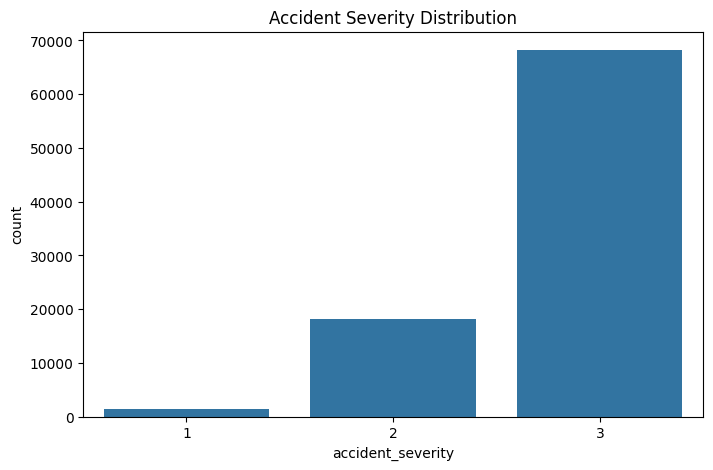

In [27]:
# Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='accident_severity')
plt.title('Accident Severity Distribution')
plt.show()

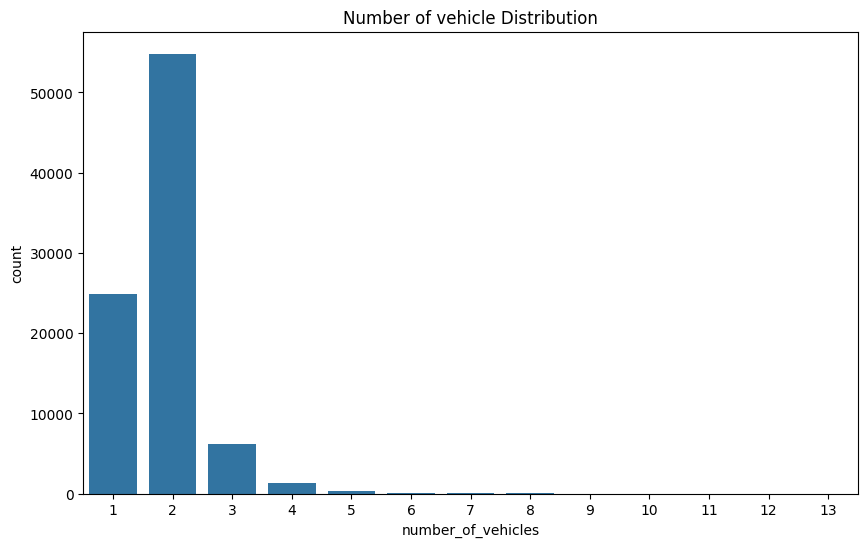

In [28]:
# Number of Vehicles
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='number_of_vehicles')
plt.title('Number of vehicle Distribution')
plt.show()

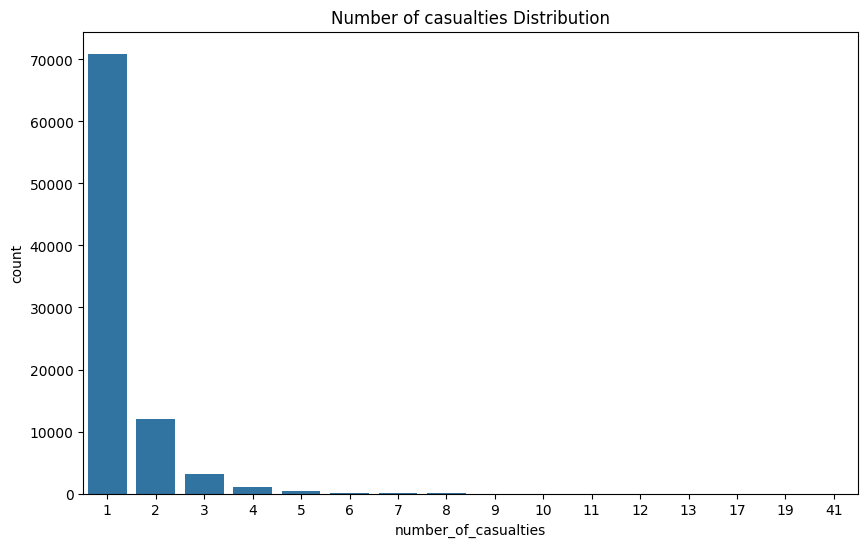

In [29]:
# Number of casualties
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='number_of_casualties')
plt.title('Number of casualties Distribution')
plt.show()

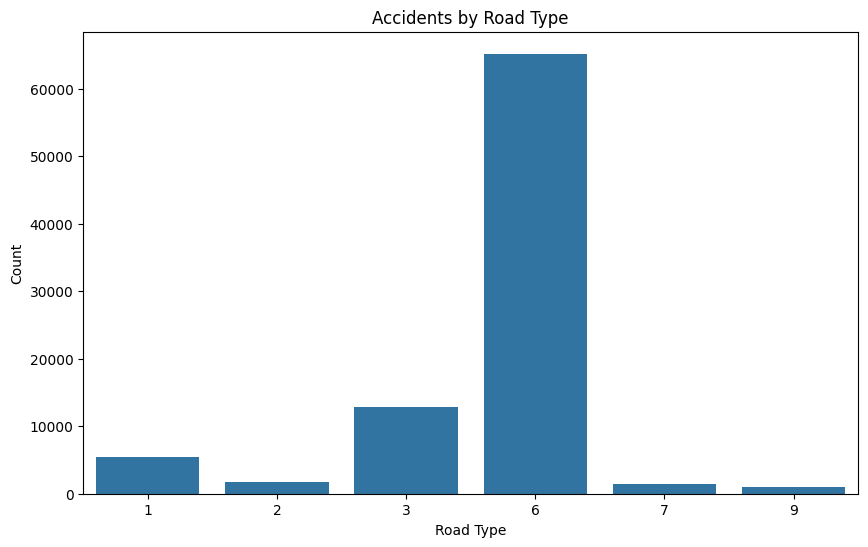

In [30]:
# Road type
plt.figure(figsize=(10, 6))
sns.countplot(x='road_type', data=data)
plt.title('Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.show()

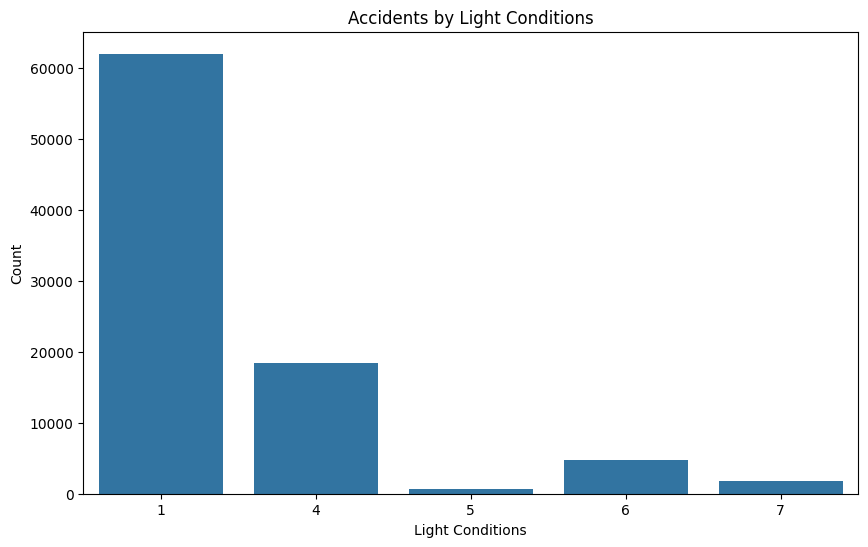

In [31]:
# Light conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='light_conditions', data=data)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.show()

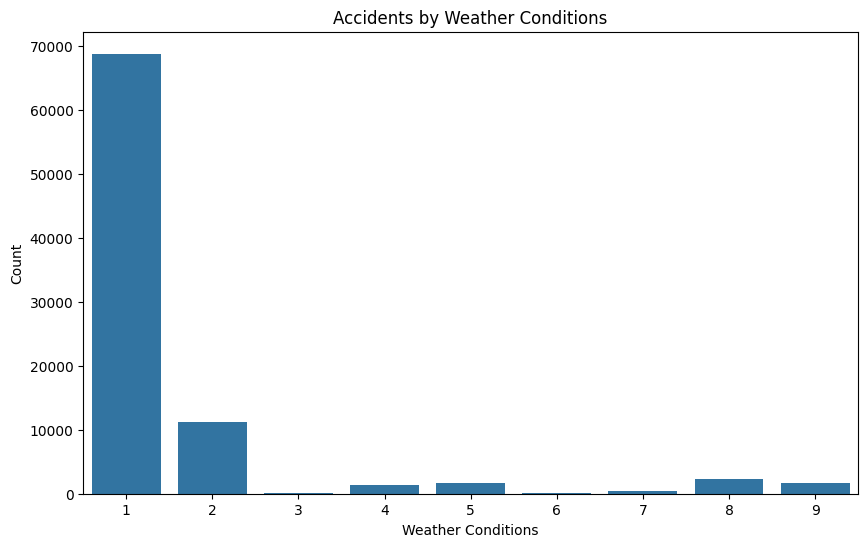

In [32]:
# Weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_conditions', data=data)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

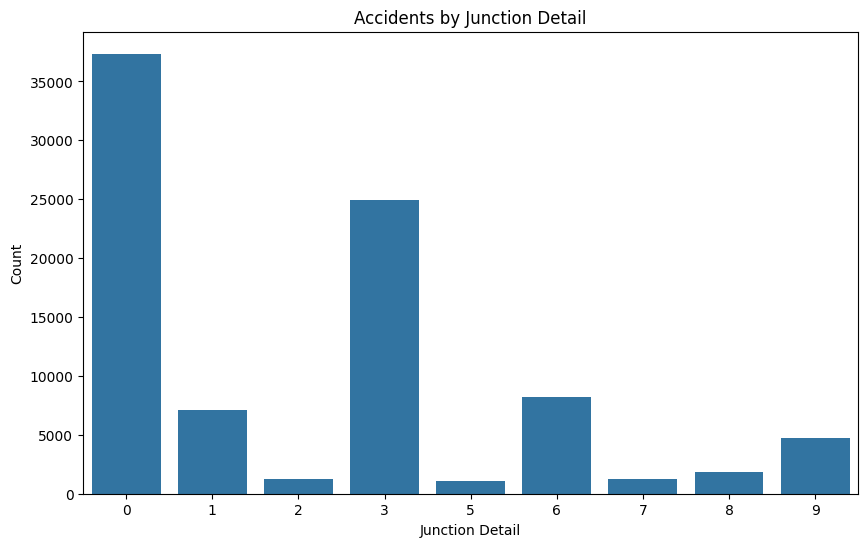

In [33]:
# junction_detail
plt.figure(figsize=(10, 6))
sns.countplot(x='junction_detail', data=data)
plt.title('Accidents by Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Count')
plt.show()

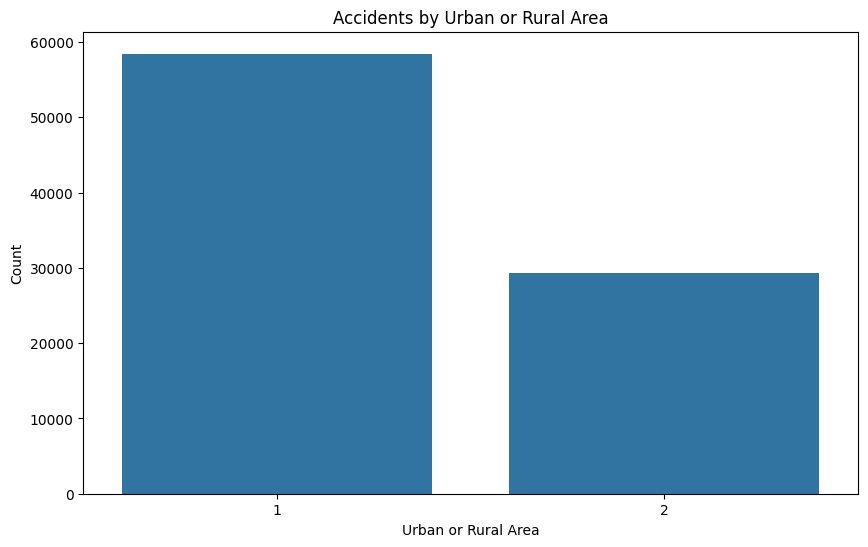

In [34]:
# Urban or Rural Area
plt.figure(figsize=(10, 6))
sns.countplot(x='urban_or_rural_area', data=data)
plt.title('Accidents by Urban or Rural Area')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count')
plt.show()

2. Bivariate Analysis

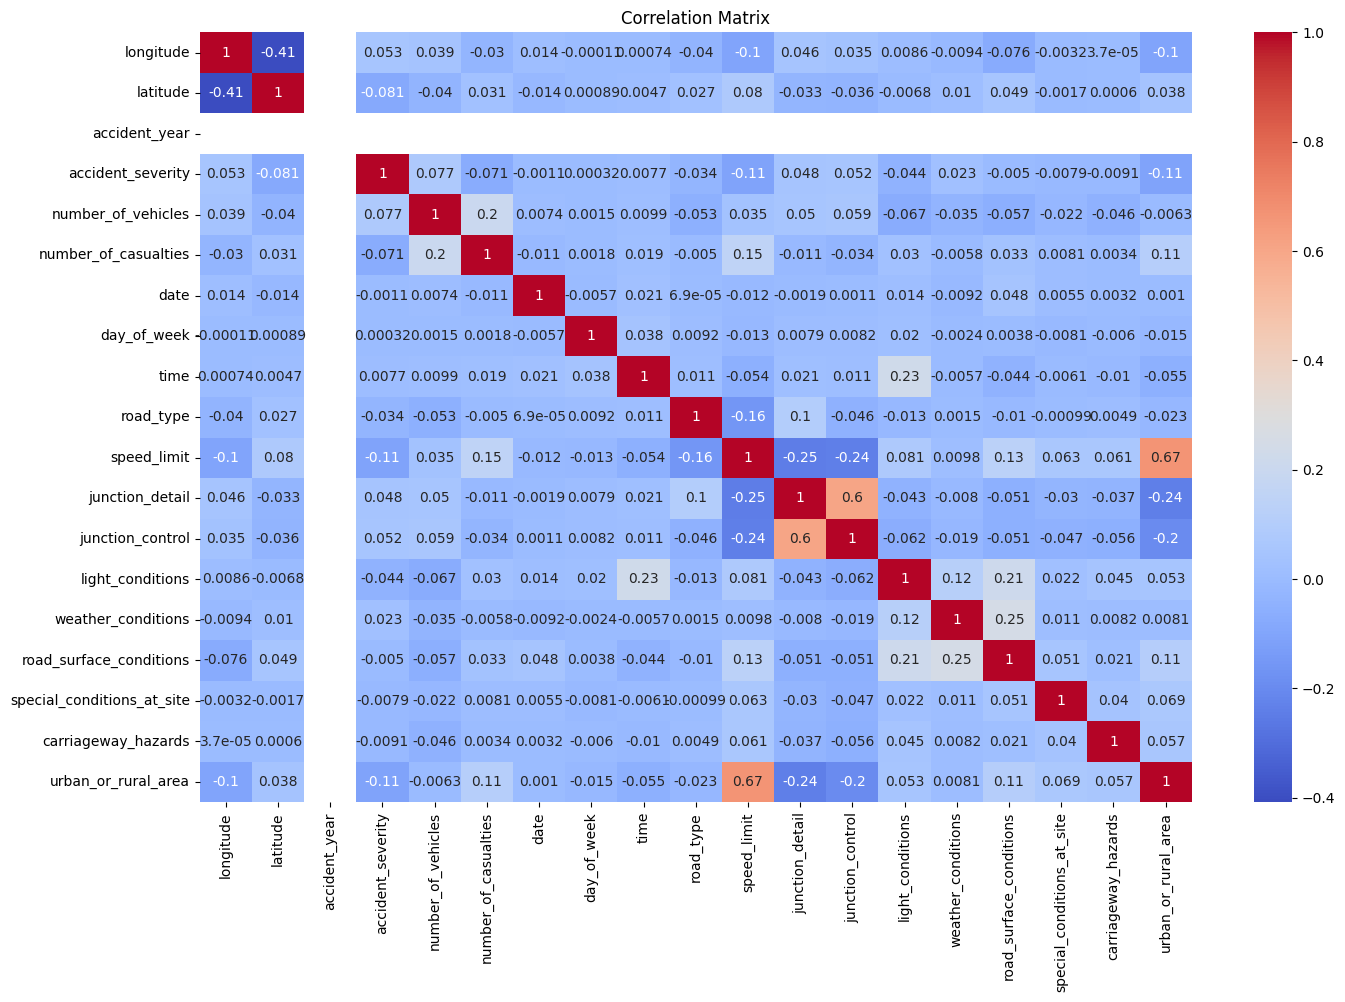

In [35]:
# Correlation matrix for numerical variables
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

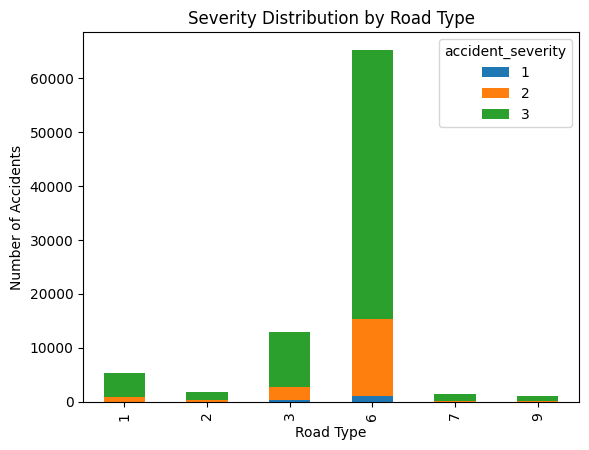

In [36]:
# Severity distribution by road type
severity_by_road_type = data.groupby('road_type')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_road_type.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

<Figure size 1000x600 with 0 Axes>

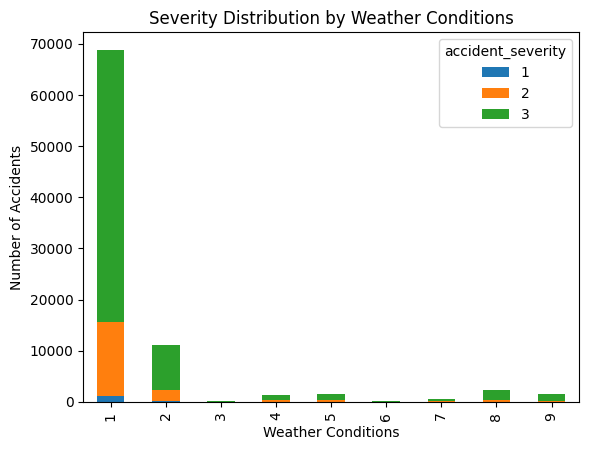

In [37]:
# Severity by weather conditions
severity_by_weather = data.groupby('weather_conditions')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_weather.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<Figure size 1000x600 with 0 Axes>

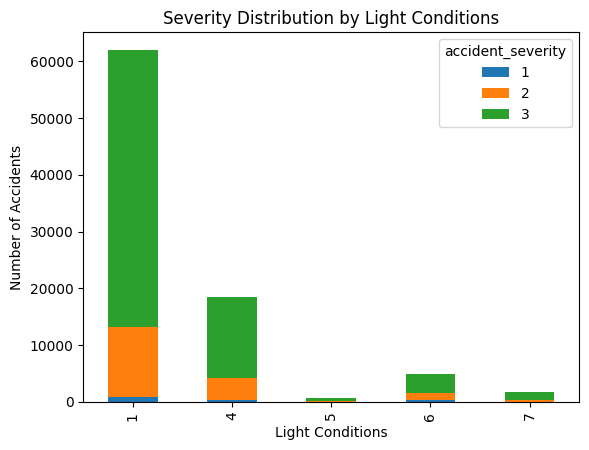

In [38]:
# Severity by light conditions
severity_by_light = data.groupby('light_conditions')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_light.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.show()


<Figure size 1000x600 with 0 Axes>

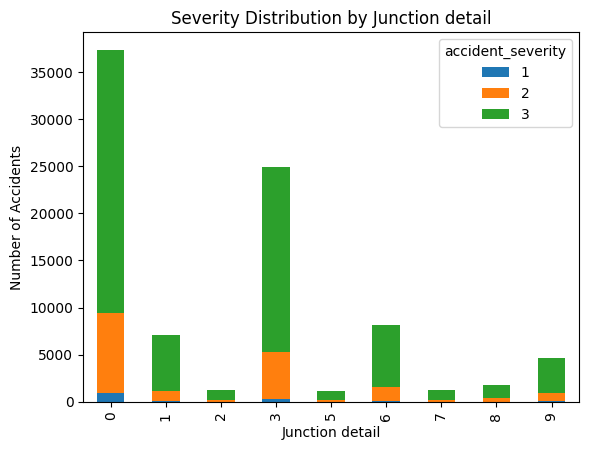

In [39]:
# Severity by junction_detail
severity_by_junction_detail = data.groupby('junction_detail')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_junction_detail.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by Junction detail')
plt.xlabel('Junction detail')
plt.ylabel('Number of Accidents')
plt.show()


<Figure size 1000x600 with 0 Axes>

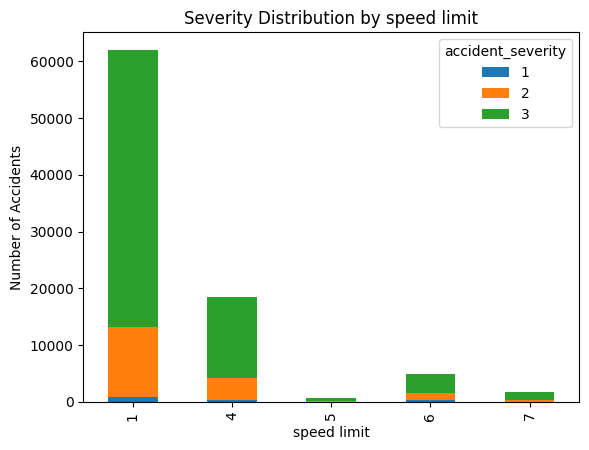

In [40]:
# Severity by speed limit
severity_by_speed_limit = df.groupby('speed_limit')['accident_severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
severity_by_light.plot(kind='bar', stacked=True)
plt.title('Severity Distribution by speed limit')
plt.xlabel('speed limit')
plt.ylabel('Number of Accidents')
plt.show()


3. Time Series Analysis

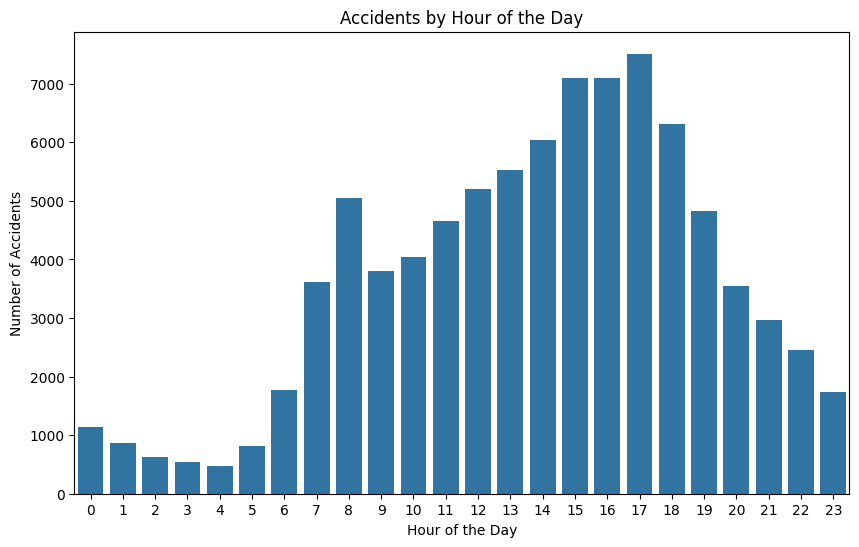

In [41]:
# Accidents by hour of the day
data['hour'] = data['time'].dt.hour
accidents_by_hour = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values)
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

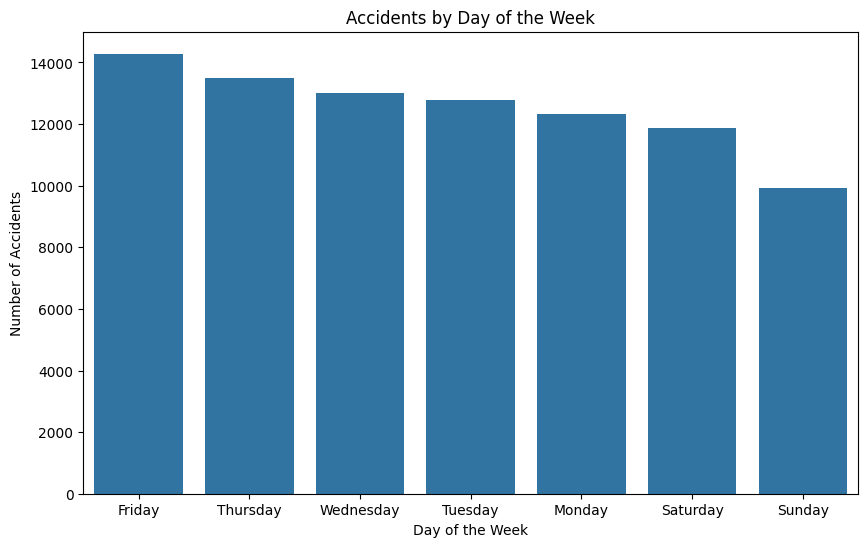

In [42]:
# Accidents by day of the week
data['day_of_week'] = data['date'].dt.day_name()
accidents_by_day = data['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

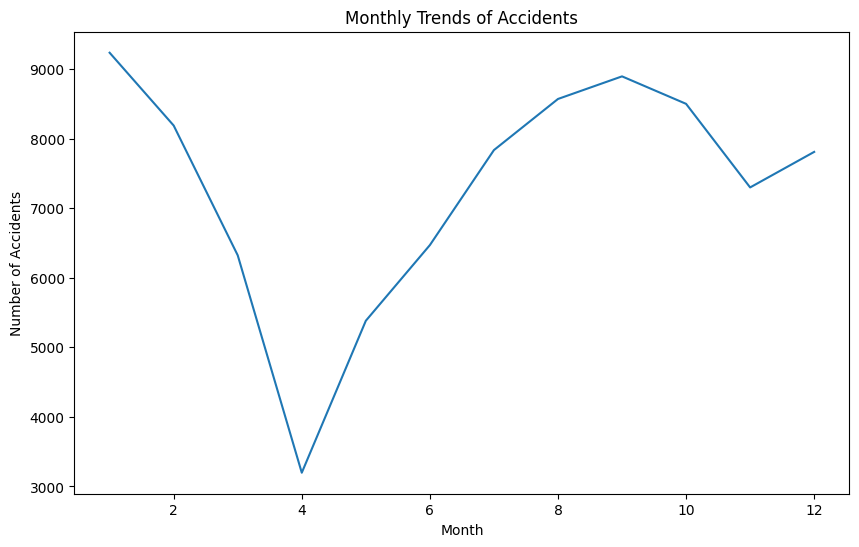

In [43]:
# Monthly trends
data['month'] = data['date'].dt.month
accidents_by_month = data['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_month.index, y=accidents_by_month.values)
plt.title('Monthly Trends of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

4. Spatial Analysis

In [44]:
import folium

map_center = [54.5, -3.5]  # Center of the UK
m = folium.Map(location=map_center, zoom_start=6)

for idx, row in df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color='red' if row['accident_severity'] == 'Fatal' else 'blue',
                        fill=True).add_to(m)

m.save('uk_road_accidents_map1.html')